In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
import plotly.graph_objects as go
import plotly.express as px
import csv
from scipy.signal import find_peaks, peak_prominences

# Normal vs. CYP2A6 Null (varying k_el)

In [2]:
df_sh = pd.read_csv('nicotineapp_datatable_standard_habit.csv')
df_cyp2a6 = pd.read_csv('nicotineapp_datatable_low_kel.csv')

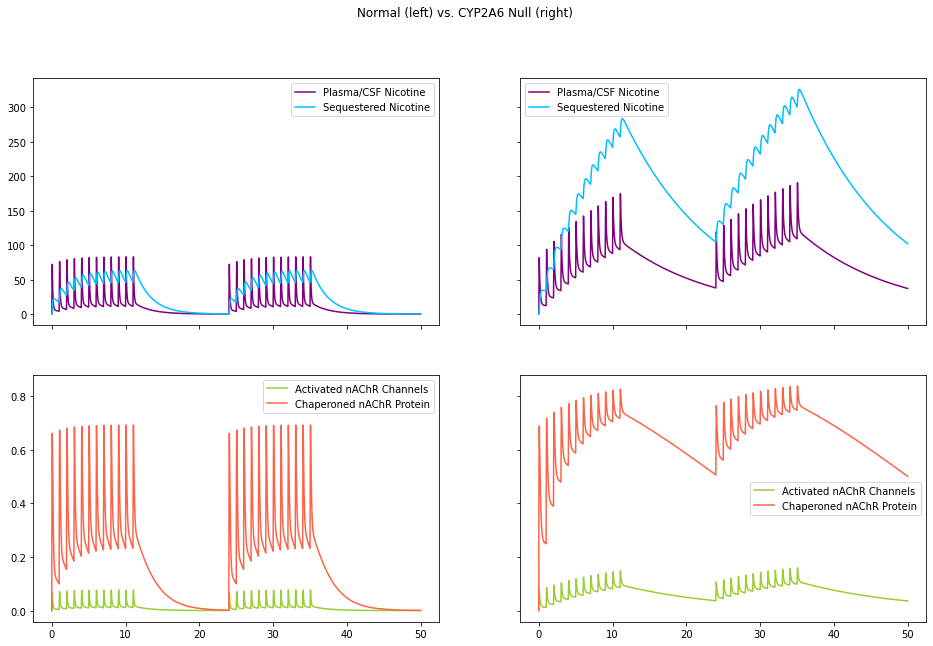

In [3]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 10))
axs[0,0].plot(df_sh['Time'], df_sh['Plasma/ CSF/ ER Nicotine'], label='Plasma/CSF Nicotine', color='purple')
axs[0,0].plot(df_sh['Time'], df_sh['Sequestered Nicotine'], label='Sequestered Nicotine', color='deepskyblue')

axs[0,1].plot(df_cyp2a6['Time'], df_cyp2a6['Plasma/ CSF/ ER Nicotine'], label='Plasma/CSF Nicotine', color='purple')
axs[0,1].plot(df_cyp2a6['Time'], df_cyp2a6['Sequestered Nicotine'], label='Sequestered Nicotine', color='deepskyblue')
#plt.yscale('log')

axs[1,0].plot(df_sh['Time'], df_sh['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,0].plot(df_sh['Time'], df_sh['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[1,1].plot(df_cyp2a6['Time'], df_cyp2a6['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,1].plot(df_cyp2a6['Time'], df_cyp2a6['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')


for i in range(2):
    for j in range(2):
        axs[i,j].legend()
plt.suptitle('Normal (left) vs. CYP2A6 Null (right)')
plt.show()

# Activation and Chaperoning based on Amount of Nicotine per Cigarette (Nicotine Dose)

In [36]:
df_sixteenth_dose = pd.read_csv('nicotineapp_datatable_sixteenth_dose.csv')
df_eighth_dose = pd.read_csv('nicotineapp_datatable_eighth_dose.csv')
df_quarter_dose = pd.read_csv('nicotineapp_datatable_quarter_dose.csv')
df_half_dose = pd.read_csv('nicotineapp_datatable_half_dose.csv')
df_1_5_dose = pd.read_csv('nicotineapp_datatable_1.5_dose.csv')
df_double_dose = pd.read_csv('nicotineapp_datatable_double_dose.csv')
df_2_5_dose = pd.read_csv('nicotineapp_datatable_2.5_dose.csv')
df_triple_dose = pd.read_csv('nicotineapp_datatable_triple_dose.csv')

doses = [1/16, 1/8, 1/4, 1/2, 1, 1.5, 2, 2.5, 3]
dose_traces = [df_sixteenth_dose, df_eighth_dose, df_quarter_dose, df_half_dose, df_sh, df_1_5_dose, df_double_dose, df_2_5_dose, df_triple_dose]

In [47]:
def highest_trough(trace):
    troughs = []
    cur = -1
    for i in range(1,len(trace) - 1):
        if cur > 0 and cur < trace[i]:
            troughs.append(cur)
        if trace[i] < trace[i-1]:
            cur = trace[i]
        if trace[i] > trace[i-1]:
            cur = -1
    return np.max(troughs)

In [48]:
dose_response_x, dose_response_y = doses, []
for t in dose_traces:
    #print(t['Fraction of Chaperoned nAChR'])
    dose_response_y.append(highest_trough(t['Fraction of Chaperoned nAChR']))
    
dose_response_y

[0.0182988427551828,
 0.0359721541616746,
 0.0695664594898622,
 0.130507042516949,
 0.23222032599414,
 0.313718824056861,
 0.380479313952281,
 0.436163784727843,
 0.483314369978862]

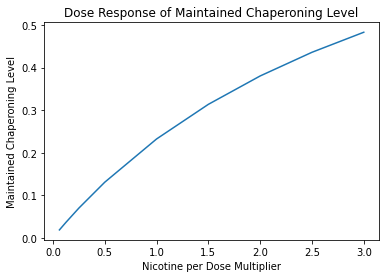

In [50]:
plt.plot(dose_response_x, dose_response_y)
plt.title('Dose Response of Maintained Chaperoning Level')
plt.xlabel('Nicotine per Dose Multiplier')
plt.ylabel('Maintained Chaperoning Level')
plt.show()

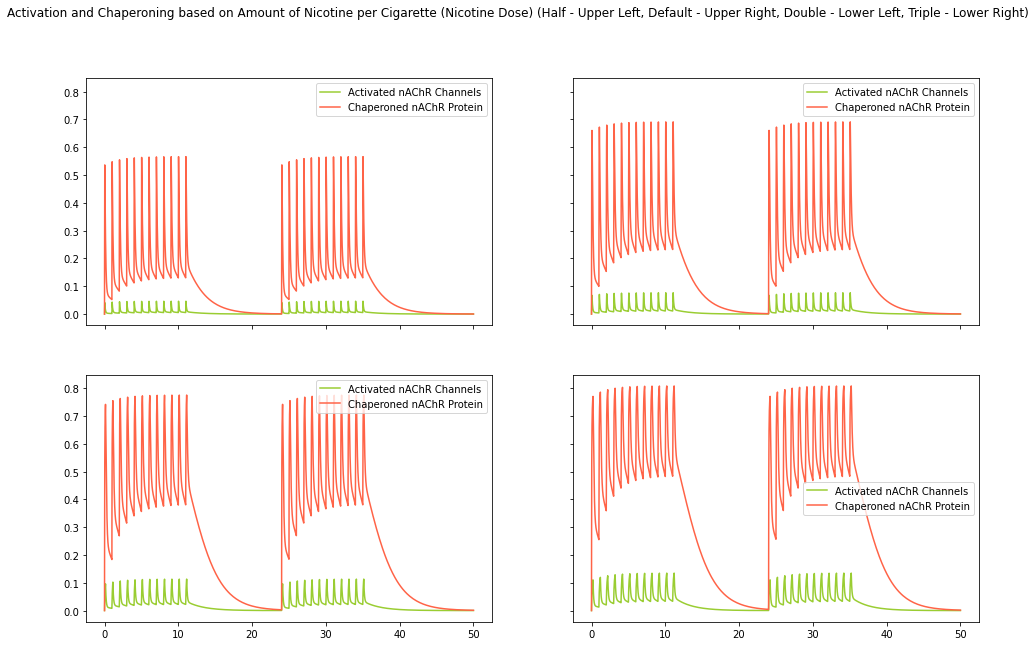

In [5]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 10))
axs[0,0].plot(df_half_dose['Time'], df_half_dose['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,0].plot(df_half_dose['Time'], df_half_dose['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')
#plt.yscale('log')

axs[1,0].plot(df_double_dose['Time'], df_double_dose['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,0].plot(df_double_dose['Time'], df_double_dose['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[1,1].plot(df_triple_dose['Time'], df_triple_dose['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,1].plot(df_triple_dose['Time'], df_triple_dose['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

for i in range(2):
    for j in range(2):
        axs[i,j].legend()
        
plt.setp(axs, ylim=axs[1,0].get_ylim())
plt.suptitle('Activation and Chaperoning based on Amount of Nicotine per Cigarette (Nicotine Dose) (Half - Upper Left, Default - Upper Right, Double - Lower Left, Triple - Lower Right)')
plt.show()

# Activation EC50

In [6]:
df_act_1 = pd.read_csv('nicotineapp_datatable_activation_1.csv')
df_act_2000 = pd.read_csv('nicotineapp_datatable_activation_2000.csv')
df_act_3000 = pd.read_csv('nicotineapp_datatable_activation_3000.csv')

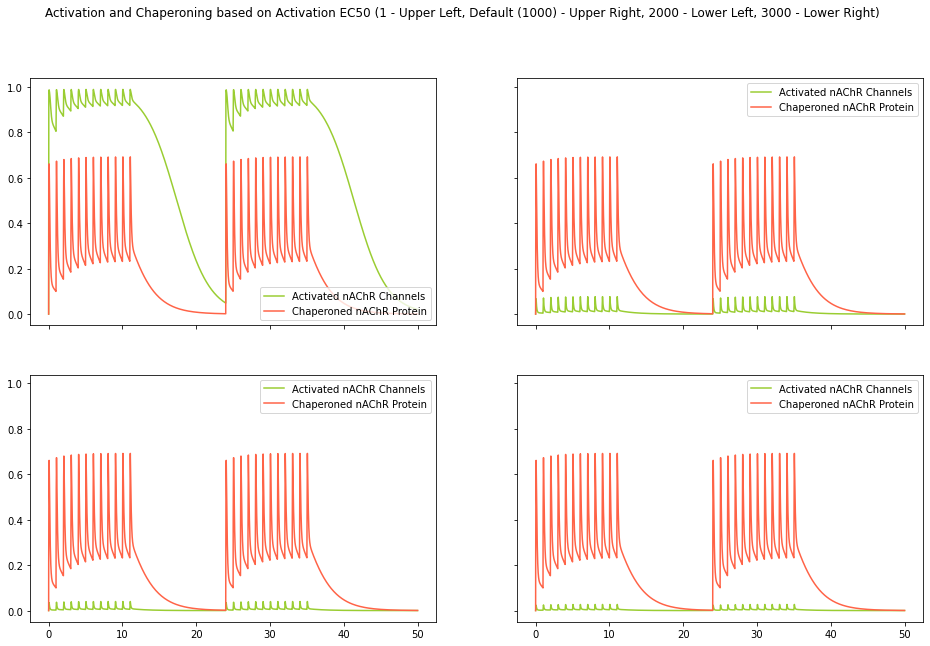

In [7]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 10))
axs[0,0].plot(df_act_1['Time'], df_act_1['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,0].plot(df_act_1['Time'], df_act_1['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')
#plt.yscale('log')

axs[1,0].plot(df_act_2000['Time'], df_act_2000['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,0].plot(df_act_2000['Time'], df_act_2000['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[1,1].plot(df_act_3000['Time'], df_act_3000['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,1].plot(df_act_3000['Time'], df_act_3000['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

for i in range(2):
    for j in range(2):
        axs[i,j].legend()
        
plt.setp(axs, ylim=axs[0,0].get_ylim())
plt.suptitle('Activation and Chaperoning based on Activation EC50 (1 - Upper Left, Default (1000) - Upper Right, 2000 - Lower Left, 3000 - Lower Right)')
plt.show()

# Chaperoning EC50

In [8]:
df_chap_1 = pd.read_csv('nicotineapp_datatable_chaperoning_1.csv')
df_chap_70 = pd.read_csv('nicotineapp_datatable_chaperoning_70.csv')
df_chap_100 = pd.read_csv('nicotineapp_datatable_chaperoning_100.csv')

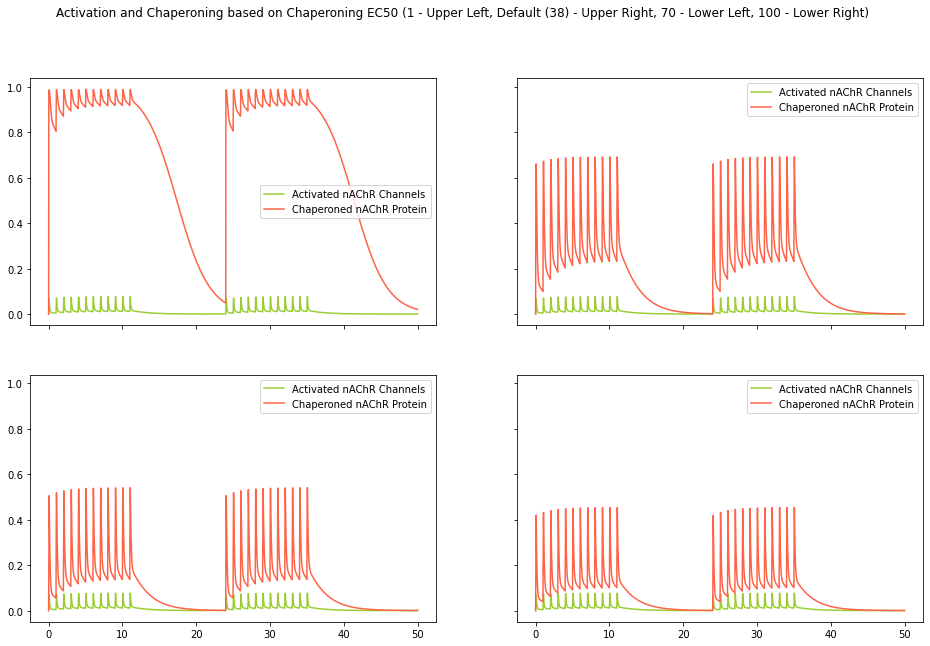

In [9]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16, 10))
axs[0,0].plot(df_chap_1['Time'], df_chap_1['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,0].plot(df_chap_1['Time'], df_chap_1['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[0,1].plot(df_sh['Time'], df_sh['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')
#plt.yscale('log')

axs[1,0].plot(df_chap_70['Time'], df_chap_70['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,0].plot(df_chap_70['Time'], df_chap_70['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

axs[1,1].plot(df_chap_100['Time'], df_chap_100['Fraction of Activated nAChR'], label='Activated nAChR Channels', color='yellowgreen')
axs[1,1].plot(df_chap_100['Time'], df_chap_100['Fraction of Chaperoned nAChR'], label='Chaperoned nAChR Protein', color='tomato')

for i in range(2):
    for j in range(2):
        axs[i,j].legend()
        
plt.setp(axs, ylim=axs[0,0].get_ylim())
plt.suptitle('Activation and Chaperoning based on Chaperoning EC50 (1 - Upper Left, Default (38) - Upper Right, 70 - Lower Left, 100 - Lower Right)')
plt.show()

# Smoking and PK Parameter Detection

### Zero-Mean Gaussian Noise

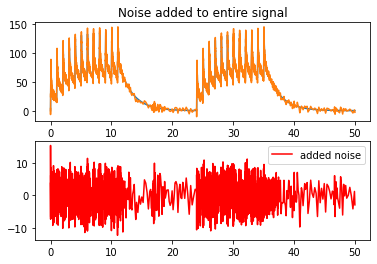

In [14]:
np.random.seed(137)
t = df_sh['Time']
p = np.add(df_sh['Plasma/ CSF/ ER Nicotine'],df_sh['Sequestered Nicotine'])
percentage = 0.10
n = np.random.normal(0, p.std(), p.size) * percentage
pn = p + n

t = df_sh['Time']
p2 = df_sh['Sequestered Nicotine']
percentage = 0.10
n2 = np.random.normal(0, p2.std(), p2.size) * percentage
pn2 = p + n2

fig = plt.figure()

ax1 = fig.add_subplot(211)
ax1.set_title('Noise added to entire signal')
ax1.plot(t, p, label='pure signal')
ax1.plot(t, pn, label='signal+noise')

ax2 = fig.add_subplot(212)
ax2.plot(t, pn - p, label='added noise', c='r')
plt.legend()
plt.show()
#plt.savefig('signal_noise.png', bbox_inches='tight')

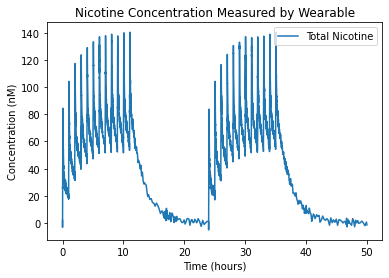

In [12]:
plt.plot(t,pn, label='Total Nicotine')
#plt.plot(t,pn2, label='Sequestered Nicotine')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (nM)')
plt.legend(loc='upper right')
plt.title('Nicotine Concentration Measured by Wearable')
plt.show()
#plt.savefig('signal_noise_nic.png', bbox_inches='tight',dpi=1200)

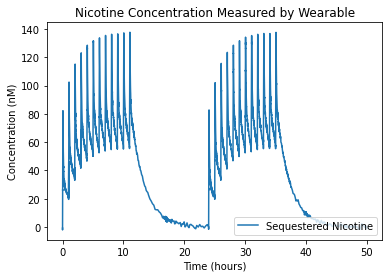

In [13]:
#plt.plot(t,pn, label='Plasma/ CSF Nicotine')
plt.plot(t,pn2, label='Sequestered Nicotine')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (nM)')
plt.legend()
plt.title('Nicotine Concentration Measured by Wearable')
plt.show()

In [15]:
df_sh

,Time,Plasma/ CSF/ ER Nicotine,Sequestered Nicotine,Fraction of Activated nAChR,Fraction of Chaperoned nAChR
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,3.980011e-19,6.208817e-16,7.625158e-34,1.482670e-32,1.482670e-32
3,3.980409e-15,6.209438e-12,7.625921e-26,1.482818e-24,1.482818e-24
4,4.378052e-14,6.829761e-11,8.464009e-24,1.645780e-22,1.645780e-22
...,...,...,...,...,...
8009,4.916360e+01,2.932524e-02,1.209350e-01,2.932460e-05,7.921072e-04
8010,4.941825e+01,2.613850e-02,1.077931e-01,2.613801e-05,7.060907e-04
8011,4.967289e+01,2.329811e-02,9.607960e-02,2.329774e-05,6.294103e-04
8012,4.992754e+01,2.076641e-02,8.563904e-02,2.076613e-05,5.610534e-04


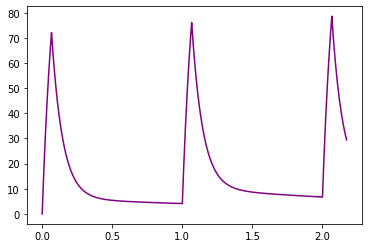

In [18]:
plt.plot(df_sh['Time'][0:1000], df_sh['Plasma/ CSF/ ER Nicotine'][0:1000], label='Plasma/CSF Nicotine', color='purple')

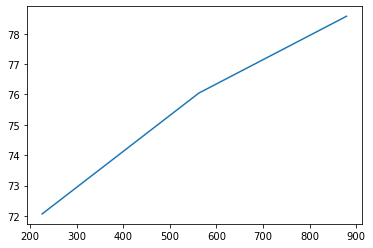

In [21]:
x = df_sh['Plasma/ CSF/ ER Nicotine'][0:1000]
peaks, _ = find_peaks(df_sh['Plasma/ CSF/ ER Nicotine'][0:1000], height=0)
plt.plot(peaks,x[peaks])

In [29]:
x = pn[0:1000]
peaks, _ = find_peaks(pn[0:1000], distance=200)
peaks
#plt.plot(pn[0:1000])

array([  2, 238, 570, 894])

In [33]:
peak_prominences(pn[0:1000], find_peaks(pn[0:1000])[0])

(array([1.18208425e+01, 6.35844482e-01, 3.40562547e+00, 6.17480503e+00,
        7.13723053e+00, 1.25021976e+01, 9.39502611e+00, 5.81646422e+00,
        4.78404350e-01, 9.41414868e-01, 7.18673154e+00, 1.02860648e+01,
        5.54039717e+00, 1.16892230e+01, 5.65756556e+00, 1.01129131e+01,
        5.98564236e+00, 8.31657020e+00, 2.94043075e+00, 5.34104375e+00,
        6.18864823e-01, 1.30379022e+01, 3.54236951e+00, 9.88950390e-01,
        6.08363852e+00, 7.30473815e-01, 1.74499152e+00, 5.78163751e+00,
        8.63811300e+00, 2.82060180e+00, 3.13485177e+00, 9.30628338e+00,
        6.34420018e+00, 2.75604946e-02, 4.24756868e+00, 9.13427403e+00,
        3.70248903e+00, 5.93482668e+00, 1.38857059e+00, 1.22538316e+01,
        1.12493919e+00, 2.41056556e+00, 5.40175900e+00, 4.00566300e-01,
        3.73025782e+00, 7.78162036e+00, 1.41353991e+00, 2.60968162e+00,
        3.48889137e+00, 3.00112037e+00, 4.25449724e+00, 2.65790029e+00,
        6.82009554e+00, 1.01606760e+01, 1.26107926e-02, 4.690703